In [3]:
#load the dataset
import pandas as pd
df = pd.read_csv("/content/burnout-DATA.csv")
print(df.shape)
print(df.info())
df.head()

(22750, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_ID           22750 non-null  object 
 1   Date_of_Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company_Type          22750 non-null  object 
 4   WFH_Setup_Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource_Allocation   21369 non-null  float64
 7   Mental_Fatigue_Score  20633 non-null  float64
 8   Burn_Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB
None


,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,30-09-08,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-08,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-08,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-08,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-08,Female,Service,No,3,7.0,6.9,0.52


In [4]:
#remove irrelevant columns
df.drop('Employee_ID',axis=1,inplace=True)
df.drop('Date_of_Joining',axis=1,inplace=True)
df.head()

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
2,Female,Product,Yes,2,NaN,5.8,0.49
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52


In [5]:
#Remove rows with missing values
df.isnull().sum()

df = df.dropna()
df.isnull().sum()

,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,0
Mental_Fatigue_Score,0
Burn_Rate,0


In [6]:
#Specify predictors and response variable
X = df.loc[:, df.columns != "Burn_Rate"]
y = df["Burn_Rate"]

In [7]:
# Function to convert categorical columns using one-hot encoding
def OneHotEncode (df):
  import pandas as pd
  from sklearn.preprocessing import OneHotEncoder
  cat = []
  num = []
  for feat in df.columns:
    if(df[feat].dtype=='object'):
      cat.append(feat)
    else:
      num.append(feat)

  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  dummy_df = pd.DataFrame(encoder.fit_transform((df[cat])))
  dummy_df.index = df.index
  dummy_df.columns = encoder.get_feature_names_out(cat)
  df.drop(cat,axis=1,inplace = True)
  df = pd.concat([df,dummy_df],axis=1)
  return df

In [8]:
## Using the function to one-hot encode the predictors
X = OneHotEncode(X)
X.head()

/tmp/ipython-input-7-2055264651.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cat,axis=1,inplace = True)


,Designation,Resource_Allocation,Mental_Fatigue_Score,Gender_Female,Gender_Male,Company_Type_Product,Company_Type_Service,WFH_Setup_Available_No,WFH_Setup_Available_Yes
0,2,3.0,3.8,1.0,0.0,0.0,1.0,1.0,0.0
1,1,2.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1,1.0,2.6,0.0,1.0,0.0,1.0,0.0,1.0
4,3,7.0,6.9,1.0,0.0,0.0,1.0,1.0,0.0
5,2,4.0,3.6,0.0,1.0,1.0,0.0,0.0,1.0


In [9]:
### Dropping the dummy redundant columns
X.drop(["WFH_Setup_Available_No","Gender_Male","Company_Type_Product"],axis=1,inplace=True)
X.head()

,Designation,Resource_Allocation,Mental_Fatigue_Score,Gender_Female,Company_Type_Service,WFH_Setup_Available_Yes
0,2,3.0,3.8,1.0,1.0,0.0
1,1,2.0,5.0,0.0,1.0,1.0
3,1,1.0,2.6,0.0,1.0,1.0
4,3,7.0,6.9,1.0,1.0,0.0
5,2,4.0,3.6,0.0,0.0,1.0


In [10]:
from sklearn import model_selection
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=7)

In [11]:
# Build and Review the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [12]:
## Evaluating the model
y_pred = lm.predict(X_test)
residuals = y_test - y_pred

/tmp/ipython-input-13-2752976187.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, ax=axs[1][0])


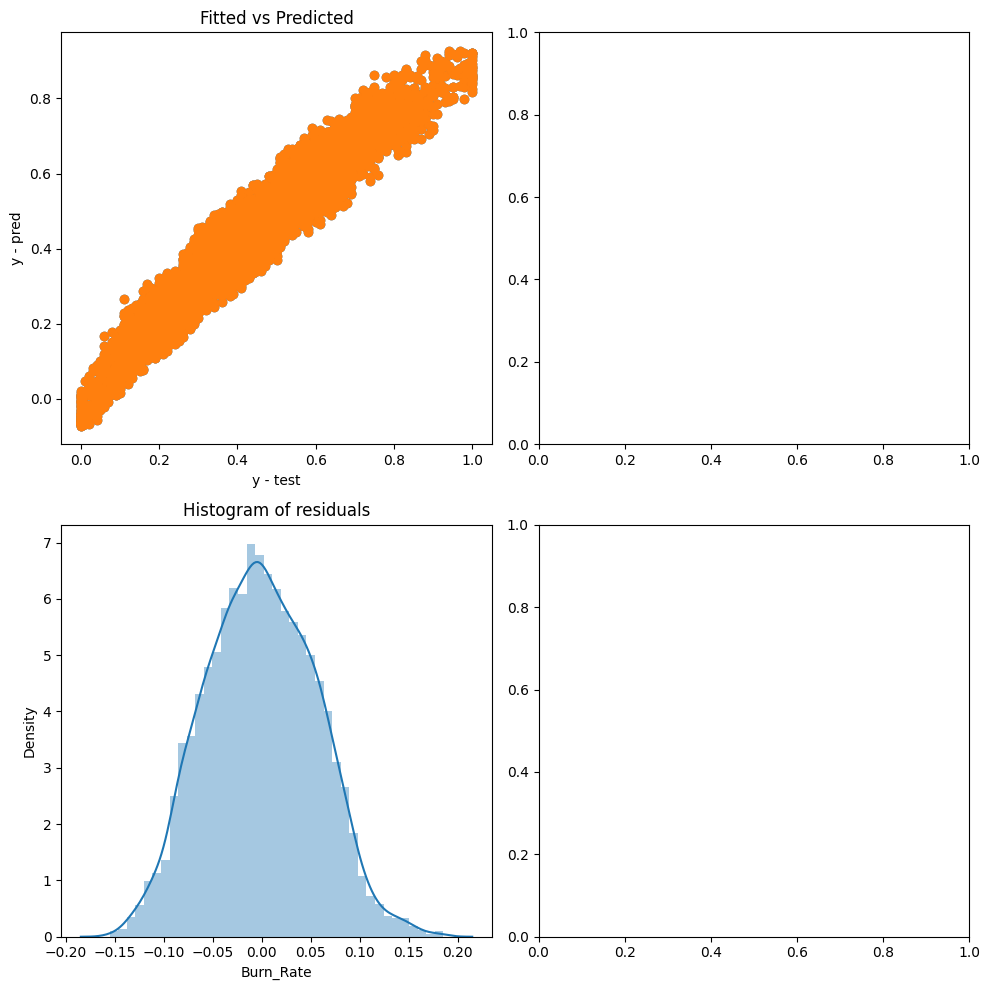

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2,2, figsize=(10,10))
#plt.tight_layout()

plt1 = axs[0][0].scatter(x=y_test, y=y_pred)
axs[0][0].set_title('Fitted vs predicted')
axs[0][0].set_xlabel('y - test')
axs[0][0].set_ylabel('y - pred')

plt2 = axs[0][0].scatter(x=y_test, y=y_pred)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('y - test')
axs[0][0].set_ylabel('y - pred')

sns.distplot(residuals, ax=axs[1][0])
axs[1][0].set_title('Histogram of residuals')
plt.tight_layout()

In [14]:
# Evaluating the model using MAE and RMSE
import numpy
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The Adjusted R-square  is:", str(model.score(X_test,y_test)))

Mean Absolute Error: 0.04563047608479636
Mean Squared Error: 0.055983588116809826
The Adjusted R-square  is: 0.9183658802224509


In [15]:
## Getting the values of the parameters of the model
print('Intercept:', model.intercept_)
cdf = pd.DataFrame(lm.coef_[0], index=X_train.columns, columns=['coefficients'])
cdf

Intercept: -0.08117687307261412


,coefficients
Designation,-0.004366
Resource_Allocation,-0.004366
Mental_Fatigue_Score,-0.004366
Gender_Female,-0.004366
Company_Type_Service,-0.004366
WFH_Setup_Available_Yes,-0.004366


In [16]:
## Getting the values of the parameters of the model
print('Intercept:', model.intercept_)
cdf = pd.DataFrame(lm.coef_[0], index=X_train.columns, columns=['coefficients'])
cdf

Intercept: -0.08117687307261412


,coefficients
Designation,-0.004366
Resource_Allocation,-0.004366
Mental_Fatigue_Score,-0.004366
Gender_Female,-0.004366
Company_Type_Service,-0.004366
WFH_Setup_Available_Yes,-0.004366


In [17]:
##Model registration and use
import pickle
pickle.dump(model, open('burnrisk_model.sav', 'wb'))

In [18]:
### Using the model for predicting the burnout rate based on the input data


In [19]:
##load the model for use
loaded_model = pickle.load(open('burnrisk_model.sav', 'rb'))

In [20]:
desg = int(input("Enter your Designation [0-5]:"))
res= int(input("Enter the number of Resource_Allocation [1-10]:"))
ftg = float(input("Enter the Mental_Fatigue_Score [0-10]:"))
gen_fem = int(input("Enter 1 if you are Female, 0 if not: "))
type_serv  = int(input("Enter 1 if you are in Service Type, 0 if not: "))
wfh_yes = int(input("Enter 1 if you have Work From Home, 0 if not: "))

Enter your Designation [0-5]:4
Enter the number of Resource_Allocation [1-10]:8
Enter the Mental_Fatigue_Score [0-10]:9
Enter 1 if you are Female, 0 if not: 0
Enter 1 if you are in Service Type, 0 if not: 0
Enter 1 if you have Work From Home, 0 if not: 0


In [21]:
import numpy as np
input_data = (desg,res, ftg,gen_fem,type_serv,wfh_yes)

In [22]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [23]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [24]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [25]:
prediction = loaded_model.predict(input_data_reshaped)
print("The risk of burnout is:   " +  str(prediction))

The risk of burnout is:   [0.79408222]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# Build and Review the Model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
linearmodel = sm.OLS(y_train, X_train).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn_Rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.443e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:48:17   Log-Likelihood:                 18315.
No. Observations:               12455   AIC:                        -3.662e+04
Df Residuals:                   12448   BIC:                        -3.656e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0812      0.002    -38.979      0.000      -0.085      -0.077
Designation                -0.0044      0.001     -4.762      0.000      -0.006      -0.003
Resource_Allocation         0.0290      0.001     47.038      0.000       0.028       0.030
Mental_Fatigue_Score        0.0734      0.000    169.126      0.000       0.073       0.074
Gender_Female              -0.0041      0.001     -4.092      0.000      -0.006      -0.002
Company_Type_Service        0.0008      0.001      0.803      0.422      -0.001       0.003
WFH_Setup_Available_Yes    -0.0111      0.001    -10.578      0.000      -0.013      -0.009
==============================================================================
Omnibus:                      136.476   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.704
Skew:                           0.084   Prob(JB):                     7.40e-21
Kurtosis:                       2.612   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""